## **CS-513 C KDD GROUP-6**

# Phishing URL Detecion

## Importing important dependencies

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Data

In [ ]:
data0 = pd.read_csv('5.urldata.csv')
data0.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0


In [ ]:
data0.shape

(10000, 18)

In [ ]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

## Data Visualization

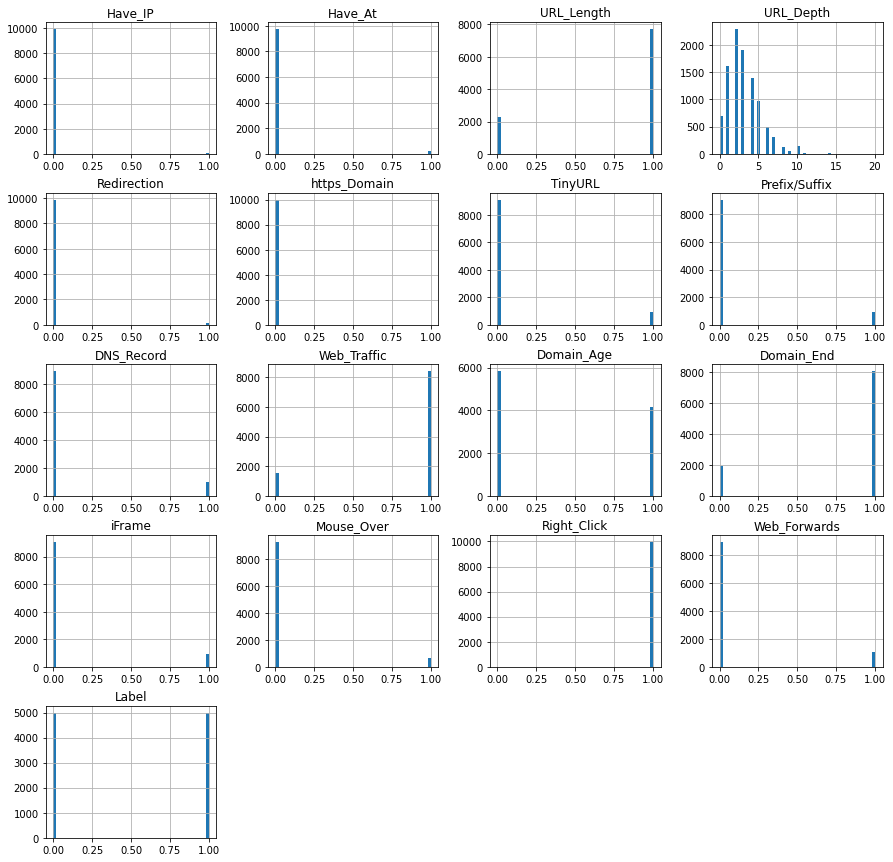

In [ ]:
data0.hist(bins = 50,figsize = (15,15))
plt.show()

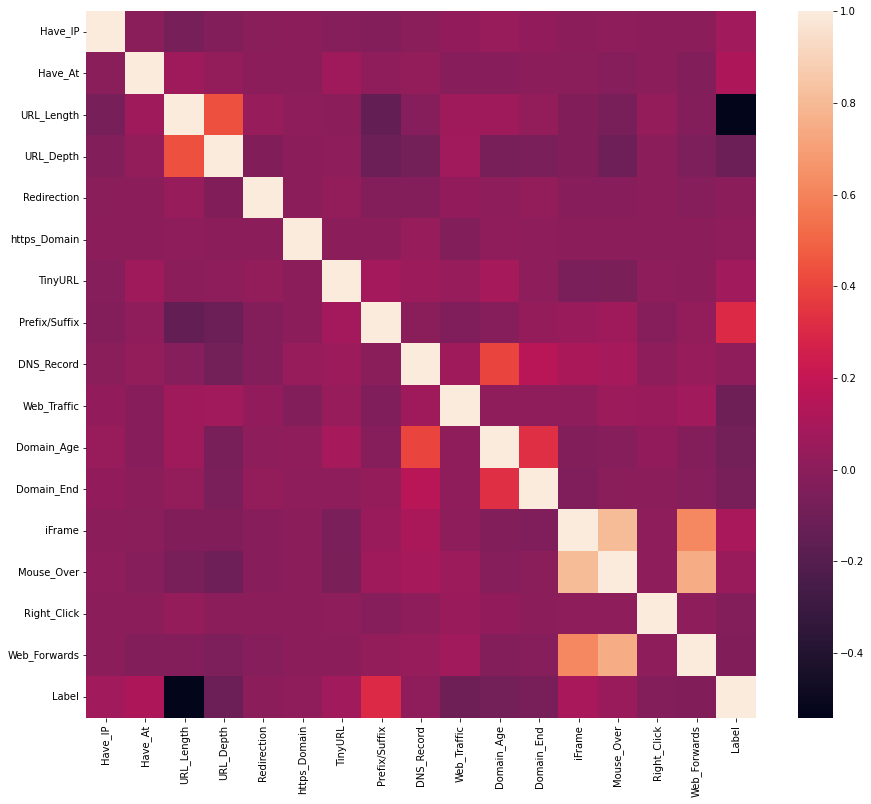

In [ ]:
plt.figure(figsize=(15,13))
sns.heatmap(data0.corr())
plt.show()

In [ ]:
data0.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000
mean,0.005500,0.022600,0.773400,3.072000,0.013500,0.000200,0.090300,0.093200,0.100800,0.845700,0.413700,0.8099,0.090900,0.06660,0.99930,0.105300,0.500000
std,0.073961,0.148632,0.418653,2.128631,0.115408,0.014141,0.286625,0.290727,0.301079,0.361254,0.492521,0.3924,0.287481,0.24934,0.02645,0.306955,0.500025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.00000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000,0.000000,0.00000,1.00000,0.000000,0.500000
75%,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0000,0.000000,0.00000,1.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000,1.000000,1.00000,1.00000,1.000000,1.000000


## Data Processing

In [ ]:
data = data0.drop(['Domain'], axis = 1).copy()
data.isnull().sum()

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,1,5,0,0,0,0,0,1,1,1,0,0,1,0,0
1,0,0,1,2,0,0,0,0,0,1,0,1,1,1,1,1,1
2,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,0,0,1,2,0,0,0,0,1,1,1,1,0,0,1,0,0
4,0,0,1,2,0,0,0,0,0,1,1,1,0,0,1,0,0


In [ ]:
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

In [ ]:
# 80-20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

# Function to store results

In [ ]:
from sklearn.metrics import accuracy_score

ML_Model = []
acc_train = []
acc_test = []
acc_conf_mat = []
acc_precision = []
acc_recall = []
acc_f1_score = []

def storeResults(model, a, b, conf, pre, rec, f1):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))
  acc_conf_mat.append(conf)
  acc_precision.append(pre)
  acc_recall.append(rec)
  acc_f1_score.append(f1)

#Decision Tree

## Creating Model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [ ]:
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.815
Decision Tree: Accuracy on test Data: 0.805


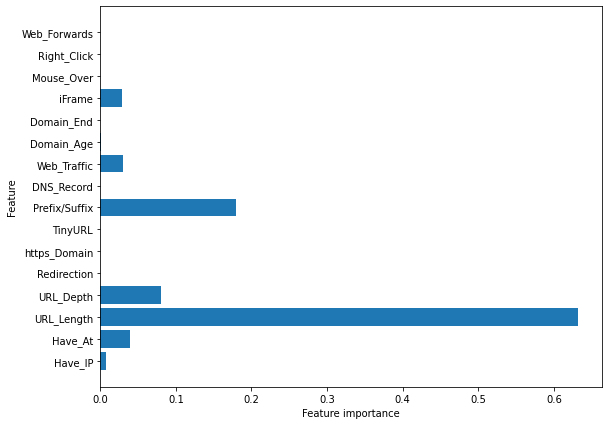

In [ ]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

## Performance Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix

DT_conf_mat = confusion_matrix(y_test,y_test_tree)

tp_and_fn = DT_conf_mat.sum(1)
tp_and_fp = DT_conf_mat.sum(0)
tp = DT_conf_mat.diagonal()

precision = tp / tp_and_fp
precision = precision.round(3)
recall = tp / tp_and_fn
recall = recall.round(3)
f1_score = (2*recall*precision)/(recall + precision)
f1_score = f1_score.round(3)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


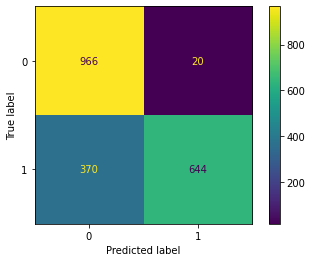

In [ ]:
 from sklearn.metrics import plot_confusion_matrix
 plot_confusion_matrix(tree, X_test, y_test)

In [ ]:
from sklearn.metrics import classification_report
 
print(classification_report(y_test, y_test_tree))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       986
           1       0.97      0.64      0.77      1014

    accuracy                           0.81      2000
   macro avg       0.85      0.81      0.80      2000
weighted avg       0.85      0.81      0.80      2000



In [ ]:
storeResults('Decision Tree', acc_train_tree, acc_test_tree, DT_conf_mat, precision, recall, f1_score)

# Random Forest

## Creating Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(max_depth=5)
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [ ]:
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

## Performance Evaluation

In [ ]:
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.818
Random forest: Accuracy on test Data: 0.813


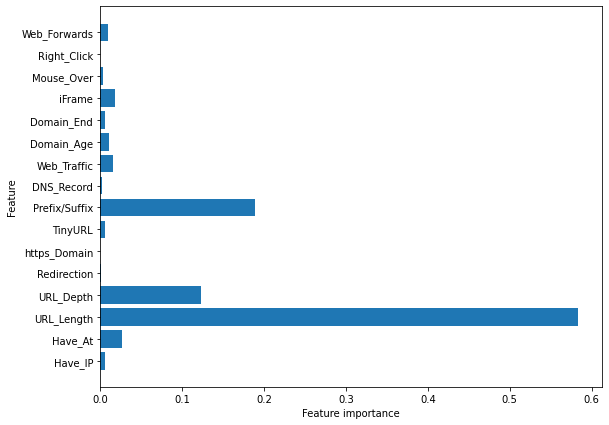

In [ ]:
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

RF_conf_mat = confusion_matrix(y_test,y_test_forest)

tp_and_fn = RF_conf_mat.sum(1)
tp_and_fp = RF_conf_mat.sum(0)
tp = RF_conf_mat.diagonal()

precision = tp / tp_and_fp
precision = precision.round(3)
recall = tp / tp_and_fn
recall = recall.round(3)
f1_score = (2*recall*precision)/(recall + precision)
f1_score = f1_score.round(3)

In [ ]:
RF_conf_mat

array([[977,   9],
       [365, 649]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


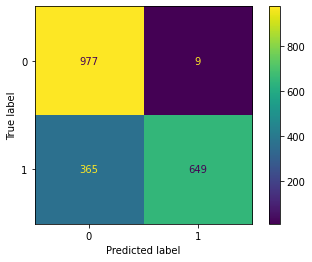

In [ ]:
 from sklearn.metrics import plot_confusion_matrix
 plot_confusion_matrix(forest, X_test, y_test)

In [ ]:
storeResults('Random Forest', acc_train_forest, acc_test_forest, RF_conf_mat, precision, recall, f1_score)

# Multiplayer Perceptrons

## Creating Model

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [ ]:
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

## Performance Evaluation

In [ ]:
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.866
Multilayer Perceptrons: Accuracy on test Data: 0.850


In [ ]:
from sklearn.metrics import confusion_matrix

MP_conf_mat = confusion_matrix(y_test,y_test_mlp)

tp_and_fn = MP_conf_mat.sum(1)
tp_and_fp = MP_conf_mat.sum(0)
tp = MP_conf_mat.diagonal()

precision = tp / tp_and_fp
precision = precision.round(3)
recall = tp / tp_and_fn
recall = recall.round(3)
f1_score = (2*recall*precision)/(recall + precision)
f1_score = f1_score.round(3)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


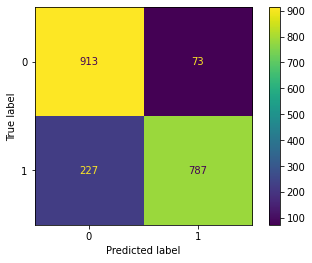

In [ ]:
 from sklearn.metrics import plot_confusion_matrix
 plot_confusion_matrix(mlp, X_test, y_test)

In [ ]:
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp, MP_conf_mat, precision, recall, f1_score)

# XGBoost

## Creating Model

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
xgb.fit(X_train, y_train)

XGBClassifier(learning_rate=0.4, max_depth=7)

In [ ]:
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

## Performance Evaluation

In [ ]:
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.868
XGBoost : Accuracy on test Data: 0.855


In [ ]:
from sklearn.metrics import confusion_matrix

XG_conf_mat = confusion_matrix(y_test,y_test_xgb)

tp_and_fn = XG_conf_mat.sum(1)
tp_and_fp = XG_conf_mat.sum(0)
tp = XG_conf_mat.diagonal()

precision = tp / tp_and_fp
precision = precision.round(3)
recall = tp / tp_and_fn
recall = recall.round(3)
f1_score = (2*recall*precision)/(recall + precision)
f1_score = f1_score.round(3)

In [ ]:
XG_conf_mat

array([[926,  60],
       [231, 783]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


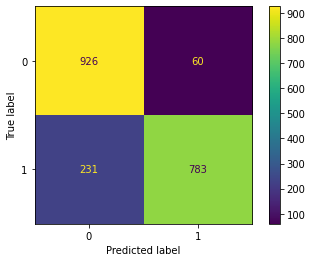

In [ ]:
 from sklearn.metrics import plot_confusion_matrix
 plot_confusion_matrix(xgb, X_test, y_test)

In [ ]:
storeResults('XGBoost', acc_train_xgb, acc_test_xgb, XG_conf_mat, precision, recall, f1_score)

# SVM

## Creating Model

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=12)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [ ]:
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

## Performance Evaluation

In [ ]:
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.804
SVM : Accuracy on test Data: 0.792


In [ ]:
from sklearn.metrics import confusion_matrix

SVM_conf_mat = confusion_matrix(y_test,y_test_svm)

tp_and_fn = SVM_conf_mat.sum(1)
tp_and_fp = SVM_conf_mat.sum(0)
tp = SVM_conf_mat.diagonal()

precision = tp / tp_and_fp
precision = precision.round(3)
recall = tp / tp_and_fn
recall = recall.round(3)
f1_score = (2*recall*precision)/(recall + precision)
f1_score = f1_score.round(3)

In [ ]:
SVM_conf_mat

array([[957,  29],
       [387, 627]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


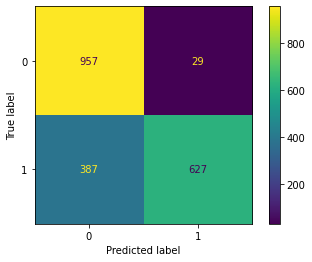

In [ ]:
 from sklearn.metrics import plot_confusion_matrix
 plot_confusion_matrix(svm, X_test, y_test)

In [ ]:
storeResults('SVM', acc_train_svm, acc_test_svm, SVM_conf_mat, precision, recall, f1_score)

# KNN

## Creating Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model = KNeighborsClassifier(n_neighbors=2)

In [ ]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
y_test_knn = model.predict(X_test)
y_train_knn = model.predict(X_train)

## Performance Evaluation

In [ ]:
acc_train_knn = accuracy_score(y_train,y_train_knn)
acc_test_knn = accuracy_score(y_test,y_test_knn)

print("KNN: Accuracy on training Data: {:.3f}".format(acc_train_knn))
print("KNN : Accuracy on test Data: {:.3f}".format(acc_test_knn))

KNN: Accuracy on training Data: 0.850
KNN : Accuracy on test Data: 0.837


In [ ]:
from sklearn.metrics import confusion_matrix

KNN_conf_mat = confusion_matrix(y_test,y_test_knn)

tp_and_fn = KNN_conf_mat.sum(1)
tp_and_fp = KNN_conf_mat.sum(0)
tp = KNN_conf_mat.diagonal()

precision = tp / tp_and_fp
precision = precision.round(3)
recall = tp / tp_and_fn
recall = recall.round(3)
f1_score = (2*recall*precision)/(recall + precision)
f1_score = f1_score.round(3)

In [ ]:
KNN_conf_mat

array([[959,  27],
       [299, 715]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


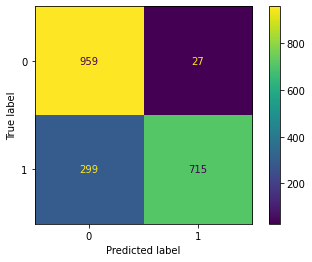

In [ ]:
 from sklearn.metrics import plot_confusion_matrix
 plot_confusion_matrix(model, X_test, y_test)

In [ ]:
storeResults('KNN', acc_train_knn, acc_test_knn, KNN_conf_mat, precision, recall, f1_score)

# Naive Bayes

## Creating Model

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
NBmodel = GaussianNB()

In [ ]:
NBmodel.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_test_nb = NBmodel.predict(X_test)
y_train_nb = NBmodel.predict(X_train)

## Performance Evaluation

In [ ]:
acc_train_nb = accuracy_score(y_train,y_train_nb)
acc_test_nb = accuracy_score(y_test,y_test_nb)

print("Naive Bayes: Accuracy on training Data: {:.3f}".format(acc_train_nb))
print("Naive Bayes : Accuracy on test Data: {:.3f}".format(acc_test_nb))

Naive Bayes: Accuracy on training Data: 0.794
Naive Bayes : Accuracy on test Data: 0.784


In [ ]:
from sklearn.metrics import confusion_matrix

NB_conf_mat = confusion_matrix(y_test,y_test_nb)

tp_and_fn = NB_conf_mat.sum(1)
tp_and_fp = NB_conf_mat.sum(0)
tp = NB_conf_mat.diagonal()

precision = tp / tp_and_fp
precision = precision.round(3)
recall = tp / tp_and_fn
recall = recall.round(3)
f1_score = (2*recall*precision)/(recall + precision)
f1_score = f1_score.round(3)

In [ ]:
NB_conf_mat

array([[972,  14],
       [417, 597]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


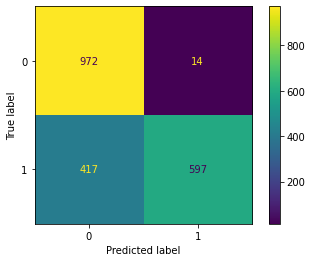

In [ ]:
 from sklearn.metrics import plot_confusion_matrix
 plot_confusion_matrix(NBmodel, X_test, y_test)

In [ ]:
storeResults('NB', acc_train_nb, acc_test_nb, NB_conf_mat, precision, recall, f1_score)

# Model Comparison

In [ ]:
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test,
    'Precision':acc_precision,
    'Recall':acc_recall,
    'F1-Score':acc_f1_score}) 
results

,ML Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
0,Decision Tree,0.815,0.805,"[0.723, 0.97]","[0.98, 0.635]","[0.832, 0.768]"
1,Random Forest,0.818,0.813,"[0.728, 0.986]","[0.991, 0.64]","[0.839, 0.776]"
2,Multilayer Perceptrons,0.866,0.850,"[0.801, 0.915]","[0.926, 0.776]","[0.859, 0.84]"
3,XGBoost,0.868,0.854,"[0.8, 0.929]","[0.939, 0.772]","[0.864, 0.843]"
4,SVM,0.804,0.792,"[0.712, 0.956]","[0.971, 0.618]","[0.822, 0.751]"
5,KNN,0.850,0.837,"[0.762, 0.964]","[0.973, 0.705]","[0.855, 0.814]"
6,NB,0.794,0.784,"[0.7, 0.977]","[0.986, 0.589]","[0.819, 0.735]"


In [ ]:
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy,Precision,Recall,F1-Score
3,XGBoost,0.868,0.854,"[0.8, 0.929]","[0.939, 0.772]","[0.864, 0.843]"
2,Multilayer Perceptrons,0.866,0.850,"[0.801, 0.915]","[0.926, 0.776]","[0.859, 0.84]"
5,KNN,0.850,0.837,"[0.762, 0.964]","[0.973, 0.705]","[0.855, 0.814]"
1,Random Forest,0.818,0.813,"[0.728, 0.986]","[0.991, 0.64]","[0.839, 0.776]"
0,Decision Tree,0.815,0.805,"[0.723, 0.97]","[0.98, 0.635]","[0.832, 0.768]"
4,SVM,0.804,0.792,"[0.712, 0.956]","[0.971, 0.618]","[0.822, 0.751]"
6,NB,0.794,0.784,"[0.7, 0.977]","[0.986, 0.589]","[0.819, 0.735]"
